# Siparişler

✏️ **Alıştırma**

Bugün, **siparişleri** ve bunlarla ilişkili **inceleme puanlarını** araştıracağız.

👉 Amacımız aşağıdaki özelliklere sahip bir DataFrame oluşturmaktır:


| özellik_adı 	| tür 	| açıklama 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| siparişin kimliği 	|
| `wait_time` 	| float 	| order_purchase_timestamp ve order_delivered_customer_date arasındaki gün sayısı 	|
| `expected_wait_time` 	| float 	| order_purchase_timestamp ve estimated_delivery_date arasındaki gün sayısı 	|
| `delay_vs_expected` 	| float 	| gerçek order_delivered_customer_date, tahmini teslimat tarihinden sonra ise, iki tarih arasındaki gün sayısını döndürür, aksi halde 0 döndürür 	|
| `order_status` 	| str 	| siparişin durumu 	|
| `dim_is_five_star` 	| int 	| sipariş beş yıldız inceleme aldıysa 1, aksi halde 0 	|
| `dim_is_one_star` 	| int 	| sipariş bir yıldız inceleme aldıysa 1, aksi halde 0 	|
| `review_score` 	| int 	| 1 ile 5 arasında 	|
| `number_of_items` 	| int 	| siparişin içerdiği ürün sayısı 	|
| `number_of_sellers` 	| int 	| siparişte yer alan satıcı sayısı 	|
| `price` 	| float 	| müşteri tarafından ödenen siparişin toplam fiyatı 	|
| `freight_value` 	| float 	| müşteri tarafından ödenen kargo değeri 	|
| `distance_customer_seller` 	| float 	| müşteri ve satıcı arasındaki km cinsinden mesafe (isteğe bağlı) 	|  
  
⚠️ Ayrıca, teslim edilmeyen siparişleri hariç tutmak istiyoruz (aksi belirtilmedikçe), yoksa olası gecikmeleri hesaplayamayız.

❓ **Sizin göreviniz**: 

- `olist/order.py` dosyasında bulunan `Order` sınıfı içinde her özelliği ayrı bir yöntem olarak uygulayın
- Ardından, **NaN'ler olmayan** tam DataFrame'i döndüren bir `get_training_data()` yöntemi oluşturun.

💡 Önerilen metodoloji:
- Önce aşağıdaki not defterini kullanarak kodunuzu adım adım yazın ve test edin
- Kod mantığınızdan emin olduktan sonra kodu `order.py` dosyasına kopyalayın
- Şu anda veri manipülasyonu mantığına odaklanın, sonraki zorluklar için veri setini görsel olarak analiz edeceğiz

🔥 Not defteri en iyi uygulamaları (okuması zorunlu) 👇

<details>
    <summary>▸ <i>buraya tıklayın</i></summary>

Bundan sonrası, keşifsel not defterleri çok uzun hale gelecek, bu nedenle bu not defteri ilkelerine uymanızı şiddetle tavsiye ederiz:
- Kodunuzu öyle yazın ki Not defteriniz her zaman baştan sona çalışabilsin (Çalıştır --> Tüm Hücreleri Çalıştır)
- Değişkenlerinizi dikkatli adlandırın 
- Uzun süre ihtiyaç duymayacağınız ara adımlar için `tmp` veya `_` gibi kullan adları kullanın
- Kodunuzu temizleyin ve uygun olduğunda hücreleri birleştirin (Not defteri boyutunu küçültmek için) (`Shift-M`)
- Daraltılabilir başlıkları ve içindekiler tablosunu yoğun olarak kullanın (bulamazsanız bir asistana danışın)
- Aşağıdaki kısayolları kullanın 
    - `a` - hücrenin üstüne ekle
    - `b` - hücrenin altına ekle
    - `dd` - hücreyi sil
    - `esc` ve `arrow tuşları` - hücreler arasında hareket et
    - `Shift-Enter` - hücreyi çalıştır ve odağı sonraki hücreye taşı
    - `Shift + Tab` tuşlarını `groupby()` gibi yöntem parantezleri arasında kullan dokları almak için! Kalıcı olarak açmak için birkaç kez tekrarla

</details>

In [ ]:
# Auto reload imported module every time a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [ ]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

In [ ]:
# What datasets do we have access to now ?
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [ ]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(orders.shape == (99441, 8))

## 1. `order.py` dosyasını kodlayın

### a) `get_wait_time`
    ❓ Aşağıdakileri içeren bir Dataframe döndürün:
           order_id, wait_time, expected_wait_time, delay_vs_expected, order_status

🎁 Aşağıda ilk yöntem için sahte kod veriyoruz 👇:

> 1. `orders` veri çerçevesini inceleyin
2. Veri çerçevesini `teslim edilen siparişler` üzerinde filtreleyin
3. `datetime` işleyin
    - Python [`datetime`](https://docs.python.org/3/library/datetime.html) nesnelerinin ne olduğunu anlamak için zaman ayırın
    - ve tarihleri "string" türünden "pandas.datetime' türüne [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) kullanarak dönüştürün
4. `wait_time` (bekleme süresi) öğesini `order_purchase_timestamp` dosyasından başlayarak gün cinsinden ondalık sayı olarak hesaplayın
5. `expected_wait_time` (beklenen bekleme süresi) öğesini `order_purchase_timestamp` dosyasından başlayarak gün cinsinden ondalık sayı olarak hesaplayın
6. `delay_vs_expected` (beklenen gecikme) öğesini gün cinsinden ondalık sayı olarak hesaplayın (sipariş tahmininden daha erken teslim edildiyse `0` koyun)
7. Yeni veri çerçevesini kontrol edin 
8. Kodunuzdan memnun olduğunuzda, kodu not defterinden `olist/order.py` dosyasına dikkatli bir şekilde kopyalayın
9. Şimdi `orders.py` dosyasında yönteminizi kullanarak verileri yüklemeyi deneyin
10. Kodunuz muhtemelen hemen çalışmayacaktır
11. Bir `.py` dosyasının içinden çalışmasını sağlamak için gerekli değişiklikleri yapın

`wait_time`, `expected_wait_time` ve `delay_vs_expected` öğelerini ondalık sayılar olarak istiyoruz, tamsayılar olarak değil. Bunu düşünün: 8.1 veya 8.9 gün bekleme süresi büyük bir farktır. Bu nedenle Pandas' `dt.day` kullanamazsınız çünkü her ikisini de 8'e yuvarlar.

<details>
    <summary>💡İpucu</summary>

Hem `wait_time` hem de `delay_vs_expected` için, ilgili tarihleri/zaman damgalarını çıkarmanız gerekir. `pandas.datetime` nesneleri arasındaki zaman farkını almak için. Ardından, [`datetime.timedelta()`](https://docs.python.org/3/library/datetime.html#timedelta-objects) veya [`np.timedelta64()`](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic) öğesini kullanarak bu çıkarmanın kaç gün temsil ettiğini öğrenebilirsiniz!

</details>

In [ ]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [ ]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# handle datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [ ]:
orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

In [ ]:
# Compute just the number of days in each time_delta
import datetime
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day
one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (use the one you prefer)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta

In [ ]:
# There is a pandas method called dt.days to compute time differences
# But this is less interesting because it rounds time differences to days... but 8.9 days is worse than 8.1 days for instance
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [ ]:
# We could use pandas' built in .clip method to remove anything below 0
# orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].clip(0)

# Or write a custom function and apply it to the column
def handle_delay(x):
    if x > 0:
        return x
    else:
        return 0

orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)

In [ ]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']]

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0


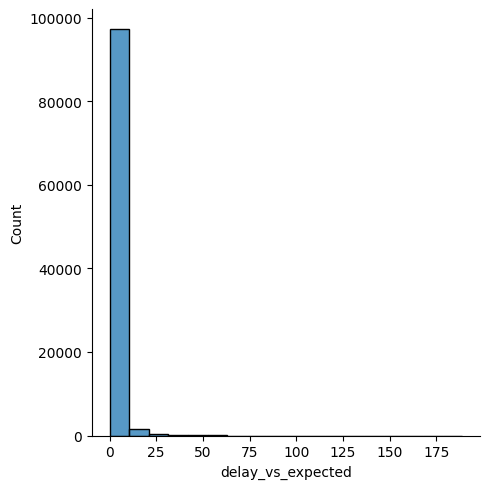

In [ ]:
sns.displot(orders['delay_vs_expected'])

👀 Oluşturduğunuz veri çerçevesini kontrol edin. <br/> 

💪 Kodunuz çalıştığında, kodunuzu `olist/order.py` dosyasına taşıyın <br/>

🧪 Şimdi aşağıdaki hücreyi çalıştırarak test edin 👇

In [ ]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


In [ ]:
from nbresult import ChallengeResult
test = Order().get_wait_time()
result = ChallengeResult('wait_time', dve_type=test["delay_vs_expected"].dtype, shape=test.shape, dve_min=test["delay_vs_expected"].min(), dve_max=test["delay_vs_expected"].max())
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_wait_time.py::TestWaitTime::test_wait_time PASSED                   [100%]

============================== 1 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/wait_time.pickle

git commit -m 'Completed wait_time step'

git push origin master



⚠️ `order.py` dosyasındaki kod değişikliklerini `olist` deponuza commit etmeyi unutmayın!

### b) `get_review_score`
     ❓ Aşağıdakileri içeren bir DataFrame döndürür:
        order_id, dim_is_five_star, dim_is_one_star, review_score

dim_is_$N$_star, review_score=$N$ ise `1` ve aksi halde `0` içermelidir 

<details>
    <summary markdown='span'>İpuçları</summary>

`Series.map()` veya `DataFrame.apply()` öğesini düşünün
    
</details>

👉 `reviews` dosyasını sizin için yüklüyoruz

In [ ]:
reviews = data['order_reviews'].copy()
assert(reviews.shape == (99224,7))
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
dim_is_one_star = lambda x: int(x==1)
dim_is_five_star = lambda x: int(x==5)

reviews["dim_is_five_star"] = reviews["review_score"].map(dim_is_five_star) # --> Series([0, 1, 1, 0, 0, 1 ...])
reviews["dim_is_one_star"] = reviews["review_score"].map(dim_is_one_star) # --> Series([0, 1, 1, 0, 0, 1 ...])

In [ ]:
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


Bir kez daha, 

👀 Oluşturduğunuz veri çerçevesini kontrol edin. <br/> 

💪 Kodunuz çalıştığında, kodunuzu `olist/order.py` dosyasına taşıyın <br/>

🧪 Şimdi aşağıdaki hücreyi çalıştırarak test edin 👇

In [ ]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('review_score', shape=Order().get_review_score().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_review_score.py::TestReviewScore::test_review_score PASSED          [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/review_score.pickle

git commit -m 'Completed review_score step'

git push origin master



⚠️ `order.py` dosyasındaki kod değişikliklerini `olist` deponuza commit etmeyi unutmayın!

### c) `get_number_items`:
     ❓ Aşağıdakileri içeren bir DataFrame döndürür:
        order_id, number_of_items (sipariş başına toplam ürün sayısı)

In [ ]:
data["order_items"].groupby("order_id").count()\
.rename(columns={"order_item_id": "number_of_items"})\
.sort_values("number_of_items")[['number_of_items']]

,number_of_items
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
a6e9d106235bcf1dda54253686d89e99,1
a6e9b80a7636eb8dd592dbb3e20d0a91,1
a6e963c11e80432334e984ead4797a8b,1
a6e8ad5db31e71f5f12671af561acb4a,1
...,...
428a2f660dc84138d969ccd69a0ab6d5,15
9ef13efd6949e4573a18964dd1bbe7f5,15
1b15974a0141d54e36626dca3fdc731a,20


🧪 Aynı yordamı takip edin: 
* veri çerçevenizi kontrol edin, 
* kodunuzu `olist/order.py` dosyasına taşıyın
* ve gerçekten çalışıp çalışmadığını kontrol edin.

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('number_items',
                         shape=Order().get_number_items().shape,
                         columns=Order().get_number_items().columns)
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_number_items.py::TestNumberItems::test_column_names PASSED          [ 50%]
test_number_items.py::TestNumberItems::test_number_items PASSED          [100%]

============================== 2 passed in 0.73s ===============================


💯 You can commit your code:

git add tests/number_items.pickle

git commit -m 'Completed number_items step'

git push origin master



⚠️ `order.py` dosyasındaki kod değişikliklerini `olist` deponuza commit etmeyi unutmayın!

### d) `get_number_sellers`:
     ❓ Aşağıdakileri içeren bir DataFrame döndürür:
        order_id, number_of_sellers (sipariş başına benzersiz satıcıların toplam sayısı)
        
<details>
    <summary>▸ <i>İpucu</i></summary>

`pd.Series.nunique()`
</details>

In [ ]:
sellers = \
    data['order_items']\
    .groupby('order_id')['seller_id'].nunique().reset_index()

sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
...,...,...
11231,1d23106803c48c391366ff224513fb7f,4
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5


In [ ]:
# Check your new dataframe and commit your code to olist/order.py when it works.
Order().get_number_sellers()

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('number_sellers',
                         shape=Order().get_number_sellers().shape,
                         columns=Order().get_number_sellers().columns)
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_number_sellers.py::TestNumberSellers::test_column_names PASSED      [ 50%]
test_number_sellers.py::TestNumberSellers::test_number_seller PASSED     [100%]

============================== 2 passed in 0.71s ===============================


💯 You can commit your code:

git add tests/number_sellers.pickle

git commit -m 'Completed number_sellers step'

git push origin master



⚠️ `order.py` dosyasındaki kod değişikliklerini `olist` deponuza commit etmeyi unutmayın!

### e) `get_price_and_freight`
     Aşağıdakileri içeren bir DataFrame döndürür:
        order_id, price, freight_value

In [ ]:
price_freight = \
    data['order_items']\
    .groupby('order_id',
             as_index=False).agg({'price': 'sum',
                                  'freight_value': 'sum'})
price_freight

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('price', shape=Order().get_price_and_freight().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_price.py::TestPrice::test_price PASSED                              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/price.pickle

git commit -m 'Completed price step'

git push origin master



⚠️ `order.py` dosyasındaki kod değişikliklerini `olist` deponuza commit etmeyi unutmayın!

## 2. Tümü bir arada: `get_training_data`

❓ Tüm sipariş özelliklerini bir tabloda toplamak için önceki kodlanmış yöntemlerinizi kullanarak `get_training_data` öğesini kodlamanın zamanı geldi

In [ ]:
# YOUR CODE HERE

🧪 Aşağıda test edin

In [ ]:
from nbresult import ChallengeResult
from olist.order import Order
data = Order().get_training_data()

result = ChallengeResult('training',
    shape=data.shape,
    columns=sorted(list(data.columns))
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_training.py::TestTraining::test_training_data_columns PASSED        [ 50%]
test_training.py::TestTraining::test_training_data_shape PASSED          [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/training.pickle

git commit -m 'Completed training step'

git push origin master



💡 **Satır sayısında tam olarak bulmamadığınız mı?**
<details><summary>8 satırda bir fark mı var?</summary>
Sonunda NaN'ler olmayan bir Dataframe istiyoruz. Bunlardan kurtulmaya çalışın. (Çok karmaşık hale getirmeyin: kodunuzda sadece bir satır değiştirmeniz gerekir.)
</details>
<details><summary>Başka bir fark mı var?</summary>
Belki tüm adımları bir Dataframe'de birleştirirken bir şeyler ters gitti? Birleştirmelerinizi kontrol edin.
</details>

🏁 Tebrikler! 

💾 Sonraki zorluğa başlamadan önce not defterinizi ve `olist/order.py` dosyasındaki kodunuzu commit ve push edin.

## 3. [İSTEĞE BAĞLI] `get_distance_seller_customer` 
**Bu işlevi yalnızca günün tüm zorluklarını tamamladıktan sonra kodlamayı deneyin.**

**Önce sonraki zorluğa atlayın.**

    ❓ Aşağıdakileri içeren bir Dataframe döndürür:
        order_id, distance_seller_customer (müşteri ve satıcı arasındaki km cinsinden mesafe)

💡 `olist.utils` modülünde sizin için kodladığımız `haversine_distance` formülüne bakın

Bunu `get_distance_seller_customer` öğesini kodlamak için kullanın.

⚠️ Bir sipariş birden fazla satıcıya sahip olabileceğinden, sipariş başına ortalama satıcı-müşteri mesafesini alın.

In [ ]:
# YOUR CODE HERE

In [ ]:
matching_geo = Order().get_distance_seller_customer()

👉 Satıcı-müşteri mesafesinin dağılımını hızlı bir şekilde kontrol edelim :)

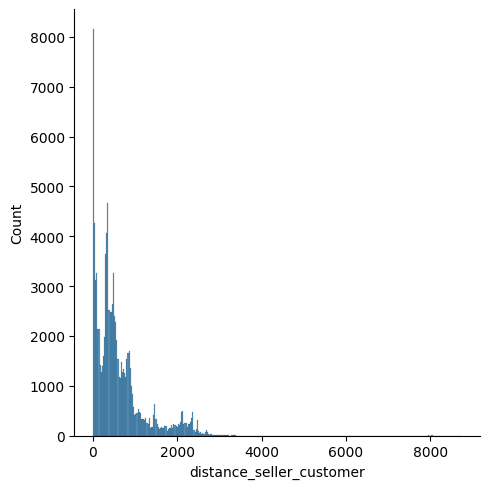

In [ ]:
sns.displot(data = matching_geo, x ='distance_seller_customer')

👉 Satıcı-müşteri mesafesinin medyanı ve ortalaması nedir?

In [ ]:
matching_geo['distance_seller_customer'].describe()

count    98177.000000
mean       601.961534
std        596.877838
min          0.000000
25%        186.380313
50%        433.698770
75%        798.435455
max       8736.947618
Name: distance_seller_customer, dtype: float64

👀 Yeni veri çerçevenizi kontrol edin ve çalışırken kodunuzu olist/order.py dosyasına taşıyın.

In [ ]:
Order().get_distance_seller_customer()['distance_seller_customer']

0         301.005664
1         589.274140
2         312.495046
3         301.951753
4         646.221788
            ...     
98172    2755.314485
98173     354.848852
98174     338.827218
98175      72.870476
98176     133.230980
Name: distance_seller_customer, Length: 98177, dtype: float64

🧪 Kodunuzu test edin

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('distance',
    mean = Order().get_distance_seller_customer()['distance_seller_customer'].mean())
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_distance.py::TestDistance::test_distance PASSED                     [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/distance.pickle

git commit -m 'Completed distance step'

git push origin master



`with_distance_seller_customer` öğesinin `True` olarak ayarlandığı durumda `get_distance_seller_customer` öğesini birleştirmek için şimdi `get_training_data` öğesini güncelleyin.

⚠️ `order.py` dosyasındaki kod değişikliklerini `olist` deponuza commit etmeyi unutmayın!